# Imported Libraries <a class="anchor" id="libraries"></a>

In [1]:
#Importing Libraries
import time
import ray
import pandas as pd
import numpy as np
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

2023-05-26 19:26:31.148753: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Function Definations 

In [2]:
def split_dataset(data, tst_size):
    """
    Split the dataset into training and testing sets using speciifed test size and return X_train, X_test, y_train, y_test.

    Args:
        data (pandas.DataFrame): The loaded dataset.
        tst_size: The test size
    Returns:
        tuple: A tuple containing X_train, X_test, y_train, and y_test.
    """

    # Split the data into features (X) and target variable (y)
    X = data.iloc[:, :40]  
    y = data.iloc[:, 40:41]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tst_size, random_state=42)

    return X_train, X_test, y_train, y_test

In [3]:
# Define a function to create Shallow Learning Model (KNN)
def create_shallow_model():
    model = KNeighborsClassifier(n_neighbors=5)
    return model

In [4]:
#Define a function to call the create_Shallow_model() and train , returning the time and accuracy 
def create_and_train_shallow_model(X_train, y_train, X_test, y_test):
    #List to hold accuracy from KNN model
    knn_acc = []

    # create object of model
    model = create_shallow_model()
    
    #Variable to hold start  time for seq SL 
    SL_seq_start_time = time.time()
    num_epocs = 20
    #compile knn model for a number of iterartions and hold value to a list
    for _ in range(num_epocs):
        model.fit(X_train, y_train)
        SL_acc = accuracy_score(y_train, model.predict(X_train))
        print(f'Epoch {_ + 1} : Accuracy {SL_acc}')
        knn_acc.append(SL_acc)



    final_test_accuracy = knn_acc[-1]
    print("Shallow Learning Model Accuracy (KNN) :", final_test_accuracy)

    #Variable to hold stop  time for seq SL 
    SL_seq_stop_time = time.time()

    #get final run time for SL sequential
    SL_seq_final_time = SL_seq_stop_time - SL_seq_start_time

    #Print runtime for SL sequential 
    print("Shallow Learning Model Sequential Trainig time (KNN) :", SL_seq_final_time,"seconds")
    
    return knn_acc, SL_seq_final_time, model

In [5]:
# Define a function to create Deep Learning Model (DNN)
# Define the Shallow Learning Model (DNN)
def create_deep_model(num_input, num_output):
    model = keras.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(num_input,)))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(num_output, activation='sigmoid'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [6]:
#Define a function to call the create_deep_model() and train , returning the time and accuracy 
def train_deep_model(X_train, y_train, X_test, y_test):
    
    # create object of model
    model = create_deep_model(X_train.shape[1], len(np.unique(y_train)))
    
    #variables to hold accuracies and epoch number
    DL_acc_list = []
    num_epochs = 20
    
    #Variable to hold start  time for seq DL
    DL_seq_start_time = time.time()
    
    #train model x-times
    for _ in range(num_epochs):
        history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=10, verbose=0)
        DL_acc = model.evaluate(X_test, y_test, verbose=0)[1]
        print(f'Epoch {_ + 1} : Accuracy {DL_acc}')
        DL_acc_list.append(DL_acc)
    final_test_accuracy = DL_acc_list[-1]
    print("Deep Learning Model Accuracy (DNN):", final_test_accuracy)
    
    #Variable to hold stop  time for seq DL 
    DL_seq_stop_time = time.time()

    #get final run time for DL sequential
    DL_seq_final_time = DL_seq_stop_time - DL_seq_start_time

    #Print runtime for SL sequential 
    print("Deep Learning Model Sequential Trainig time (DNN) :", DL_seq_final_time,"seconds")
    return DL_acc_list, DL_seq_final_time, model

# 2.2 Machine learning model creation and training

## Loading the data in the combined NSL_DL vector<a class="anchor" id="load_data">

In [7]:
# Load the combined preprocessed DS_NSL_Final dataset generated and exported to an excel sheet  from task 2.1
dataset = pd.read_excel("DS_NSL_Final.xlsx")

### Segmenting Combined NSL-KDD into 30% testing and 70% training, then display the numbers of columns and rows

In [8]:
X_train, X_test, y_train, y_test = split_dataset(dataset, 0.3)

In [9]:
# #reshape y_train and y_test
# y_train = y_train.ravel()
# y_test = y_test.ravel()

# Convert y_train DataFrame to numpy array and flatten it
y_train = y_train.values.ravel()

# Convert y_test DataFrame to numpy array and flatten it
y_test = y_test.values.ravel()

## Sequential Execution of KNN and DNN

### Shallow Learning Model KNN

In [10]:
knn_acc, SL_seq_final_time, KNN =  create_and_train_shallow_model(X_train, y_train, X_test, y_test)

Epoch 1 : Accuracy 0.9903286807744259
Epoch 2 : Accuracy 0.9903286807744259
Epoch 3 : Accuracy 0.9903286807744259
Epoch 4 : Accuracy 0.9903286807744259
Epoch 5 : Accuracy 0.9903286807744259
Epoch 6 : Accuracy 0.9903286807744259
Epoch 7 : Accuracy 0.9903286807744259
Epoch 8 : Accuracy 0.9903286807744259
Epoch 9 : Accuracy 0.9903286807744259
Epoch 10 : Accuracy 0.9903286807744259
Epoch 11 : Accuracy 0.9903286807744259
Epoch 12 : Accuracy 0.9903286807744259
Epoch 13 : Accuracy 0.9903286807744259
Epoch 14 : Accuracy 0.9903286807744259
Epoch 15 : Accuracy 0.9903286807744259
Epoch 16 : Accuracy 0.9903286807744259
Epoch 17 : Accuracy 0.9903286807744259
Epoch 18 : Accuracy 0.9903286807744259
Epoch 19 : Accuracy 0.9903286807744259
Epoch 20 : Accuracy 0.9903286807744259
Shallow Learning Model Accuracy (KNN) : 0.9903286807744259
Shallow Learning Model Sequential Trainig time (KNN) : 114.86100196838379 seconds


### Deep Learning Model

In [11]:
#Train dnn
# Train the Deep Learning Model (DNN)
DL_acc_list, DL_seq_final_time, DNN =  train_deep_model(X_train, y_train, X_test, y_test)

2023-05-26 19:29:03.499620: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1 : Accuracy 0.9525150060653687
Epoch 2 : Accuracy 0.9570114016532898
Epoch 3 : Accuracy 0.9552464485168457
Epoch 4 : Accuracy 0.9565491676330566
Epoch 5 : Accuracy 0.9553725123405457
Epoch 6 : Accuracy 0.9578098058700562
Epoch 7 : Accuracy 0.9567172527313232
Epoch 8 : Accuracy 0.959028422832489
Epoch 9 : Accuracy 0.9577257633209229
Epoch 10 : Accuracy 0.943900465965271
Epoch 11 : Accuracy 0.9578938484191895
Epoch 12 : Accuracy 0.9592806100845337
Epoch 13 : Accuracy 0.9562970399856567
Epoch 14 : Accuracy 0.9567592740058899
Epoch 15 : Accuracy 0.958061933517456
Epoch 16 : Accuracy 0.9587762951850891
Epoch 17 : Accuracy 0.9563390612602234
Epoch 18 : Accuracy 0.9573895931243896
Epoch 19 : Accuracy 0.95650714635849
Epoch 20 : Accuracy 0.9562970399856567
Deep Learning Model Accuracy (DNN): 0.9562970399856567
Deep Learning Model Sequential Trainig time (DNN) : 1941.634501695633 seconds


### Plot the statistics from training iterations of both SL and DL models showing learning accuracies on the y-axis and number of iterations on the x-axis

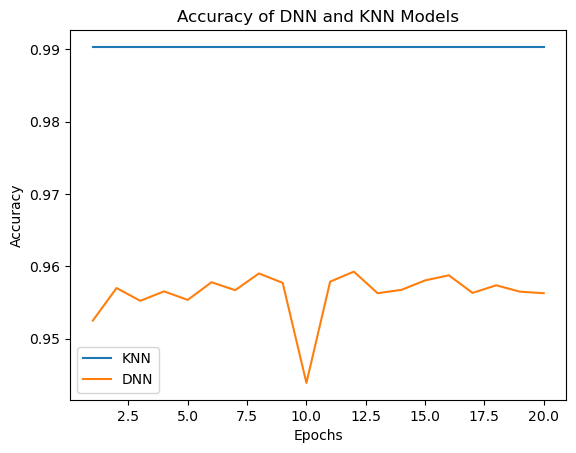

In [12]:
# Number of epochs
epochs = range(1, 21)

# Accuracy values for DNN and KNN models

# Plotting the graph
plt.plot(epochs, knn_acc, label='KNN')
plt.plot(epochs, DL_acc_list, label='DNN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy of DNN and KNN Models')
plt.legend()
plt.show()


## Parallel Execution of DNN and KNN

In [13]:
# # Split data into batches with fixed batch size
# batch_size = len(X_train) // 5  # Adjust the batch size as needed
# x_batches = np.array_split(X_train, batch_size)
# y_batches = np.array_split(y_train, batch_size)

X_train_batches = np.array_split(X_train, 20)
y_train_batches = np.array_split(y_train, 20)

In [14]:
@ray.remote
def train_shallow_model(X_train, y_train, X_test, y_test):
    # Create and train the Shallow Learning Model (KNN)
    model = KNeighborsClassifier(n_neighbors=5)
    accuracies = []
    for _ in range(20):
        model.fit(X_train, y_train)
        accuracy = accuracy_score(y_test, model.predict(X_test))
        accuracies.append(accuracy)
    return accuracies[-1], model

@ray.remote
def train_deep_model(X_train, y_train, X_test, y_test):
    # Create and train the Deep Learning Model (DNN)
    model = create_deep_model(X_train.shape[1], len(np.unique(y_train)))
    accuracies = []
    for _ in range(20):
        history = model.fit(X_train, y_train, epochs=10, batch_size=10, verbose=0)
        accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
        accuracies.append(accuracy)
    return accuracies[-1], model

In [15]:
# Train the Deep Learning Model (KNN) in parallel

knn_tasks=[]
knn_results=[]

#measure training time
knn_start_time = time.time()

#initialize ray
ray.shutdown()
ray.init()

#train model x-times
for i in range(20):
    knn_tasks.append(train_shallow_model.remote(X_train_batches[i], y_train_batches[i], X_test, y_test))
knn_total_time = time.time() - knn_start_time

#calculate metrics 
for task in knn_tasks:
    accuracy, model = ray.get(task)
    knn_results.append(accuracy)

# Print the time
print("Total KNN Model Training Time in parallel :", knn_total_time, "seconds")

2023-05-26 20:01:29,019	INFO worker.py:1625 -- Started a local Ray instance.


Total KNN Model Training Time in parallel : 4.866597890853882 seconds


In [16]:
# Train the Deep Learning Model (DNN) in parallel
dnn_tasks = []
dnn_results = []

#measure training time
dnn_start_time = time.time()

#initialize ray
ray.shutdown()
ray.init()

#train model x-times
for i in range(20):
    dnn_tasks.append(train_deep_model.remote(X_train_batches[i], y_train_batches[i], X_test, y_test))
    


#calculate metrics
for task in dnn_tasks:
    accuracy, model = ray.get(task)
    dnn_results.append(accuracy)
dnn_total_time = time.time() - dnn_start_time

# Print the time
print("Total DNN Model Training Time in parallel :", dnn_total_time, "seconds")

2023-05-26 20:03:45,737	INFO worker.py:1625 -- Started a local Ray instance.
(pid=52104) 2023-05-26 20:03:47.760506: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
(pid=52104) To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
(train_deep_model pid=52102) 2023-05-26 20:03:58.007114: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA [repeated 8x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/ray-logging.html#log-deduplication for more options.)
(train_deep_model 

Total DNN Model Training Time in parallel : 636.1104078292847 seconds


In [17]:
print("Total KNN Model Training Time in parallel :", knn_total_time, "seconds")
print("Total DNN Model Training Time in parallel :", dnn_total_time, "seconds")

Total KNN Model Training Time in parallel : 4.866597890853882 seconds
Total DNN Model Training Time in parallel : 636.1104078292847 seconds


In [18]:
# display time taken for both model in sequential and parallel 

# Print the sequential and parallel training times for KNN 
print("Sequential Training Time for KNN:", SL_seq_final_time, "seconds")
print("Parallel Training Time for KNN:", knn_total_time, "seconds")


# Print the sequential and parallel training times for DNN 
print("Sequential Training Time for DNN:", DL_seq_final_time, "seconds")
print("Parallel Training Time for DNN:", dnn_total_time, "seconds")

Sequential Training Time for KNN: 114.86100196838379 seconds
Parallel Training Time for KNN: 4.866597890853882 seconds
Sequential Training Time for DNN: 1941.634501695633 seconds
Parallel Training Time for DNN: 636.1104078292847 seconds


### Plot graph to show comparison of time taken by SL and DL for sequential training and for parallel training.

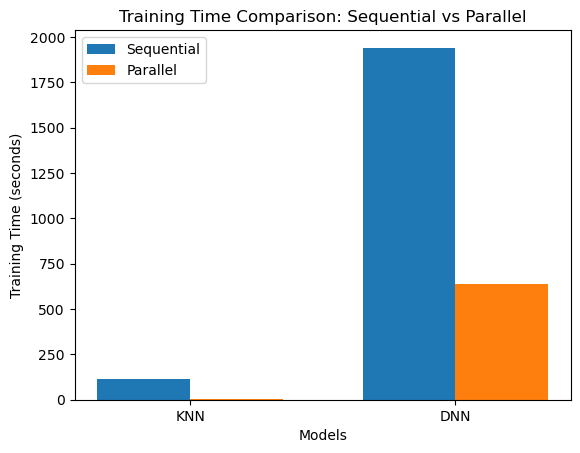

In [19]:
# Sequential training times
sequential_times = [SL_seq_final_time, DL_seq_final_time]

# Parallel training times
parallel_times = [knn_total_time, dnn_total_time]

# Create a bar chart
labels = ['KNN', 'DNN']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, sequential_times, width, label='Sequential')
rects2 = ax.bar(x + width/2, parallel_times, width, label='Parallel')

# Add labels, title, and legend
ax.set_ylabel('Training Time (seconds)')
ax.set_xlabel('Models')
ax.set_title('Training Time Comparison: Sequential vs Parallel')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display the bar chart
plt.show()


### Time Taken for both Models in Sequential and Parallel

In [20]:
# Create a DataFrame
df_time = pd.DataFrame({
    'KNN': [SL_seq_final_time],
    'DNN': [DL_seq_final_time],
    'KNN_Parallel': [knn_total_time],
    'DNN_Parallel': [dnn_total_time]
})

# Add epoch column
df_time['SN'] = range(1, len(df_time) + 1)

# Set epoch as index
df_time.set_index('SN', inplace=True)

# Apply styling to the DataFrame
styled_df = df_time.style \
    .format('{:.2f}') \
    .background_gradient(cmap='Blues') \
    .set_table_styles([{'selector': 'table', 'props': [('border', '3px solid red')]}])

# Display the styled DataFrame
styled_df

,KNN,DNN,KNN_Parallel,DNN_Parallel
SN,,,,
1,114.86,1941.63,4.87,636.11


### Display accuracies of KNN and DNN in Sequential 

In [21]:
# Create a DataFrame
df_seq = pd.DataFrame({
    'KNN': knn_acc,
    'DNN': DL_acc_list
})

# Add epoch column
df_seq['Epoch'] = range(1, len(DL_acc_list) + 1)

# Set epoch as index
df_seq.set_index('Epoch', inplace=True)

# Apply styling to the DataFrame
styled_df_seq = df_seq.style\
    .format('{:.4f}')\
    .background_gradient(cmap='Blues')

# Display the styled DataFrame
styled_df_seq

,KNN,DNN
Epoch,,
1,0.9903,0.9525
2,0.9903,0.9570
3,0.9903,0.9552
4,0.9903,0.9565
5,0.9903,0.9554
6,0.9903,0.9578
7,0.9903,0.9567
8,0.9903,0.9590
9,0.9903,0.9577


### Display accuracies of KNN and DNN in Parallel  

In [22]:
# Create a DataFrame
df_par = pd.DataFrame({
    'KNN_Parallel': knn_results,
    'DNN_Parallel': dnn_results
})

# Add epoch column
df_par['Epoch'] = range(1, len(knn_results) + 1)

# Set epoch as index
df_par.set_index('Epoch', inplace=True)

# Apply styling to the DataFrame
styled_df_par = df_par.style\
    .format('{:.4f}')\
    .background_gradient(cmap='Blues')

# Display the styled DataFrame
styled_df_par

,KNN_Parallel,DNN_Parallel
Epoch,,
1,0.9492,0.9418
2,0.9429,0.9344
3,0.9480,0.9457
4,0.9468,0.9479
5,0.9456,0.9311
6,0.9474,0.9412
7,0.9498,0.9471
8,0.9448,0.9468
9,0.9487,0.9421


### Display accuracies of KNN and DNN in Sequence and Parallel 

In [23]:
# Create a DataFrame
df_combined = pd.DataFrame({
    'KNN': knn_acc,
    'DNN': DL_acc_list,
    'KNN_Parallel': knn_results,
    'DNN_Parallel': dnn_results
})

# Add epoch column
df_combined['Epoch'] = range(1, len(knn_acc) + 1)

# Set epoch as index
df_combined.set_index('Epoch', inplace=True)

# Apply styling to the DataFrame
styled_df_combined = df_combined.style \
    .format('{:.4f}') \
    .background_gradient(cmap='Blues')

# Display the styled DataFrame
styled_df_combined

,KNN,DNN,KNN_Parallel,DNN_Parallel
Epoch,,,,
1,0.9903,0.9525,0.9492,0.9418
2,0.9903,0.9570,0.9429,0.9344
3,0.9903,0.9552,0.9480,0.9457
4,0.9903,0.9565,0.9468,0.9479
5,0.9903,0.9554,0.9456,0.9311
6,0.9903,0.9578,0.9474,0.9412
7,0.9903,0.9567,0.9498,0.9471
8,0.9903,0.9590,0.9448,0.9468
9,0.9903,0.9577,0.9487,0.9421


In [24]:
# display time taken for both model in sequential and parallel 

# Print the sequential and parallel training times for KNN 
print("Sequential Training Time for KNN:", SL_seq_final_time, "seconds")
print("Parallel Training Time for KNN:", knn_total_time, "seconds")


# Print the sequential and parallel training times for DNN 
print("Sequential Training Time for DNN:", DL_seq_final_time, "seconds")
print("Parallel Training Time for DNN:", dnn_total_time, "seconds")

Sequential Training Time for KNN: 114.86100196838379 seconds
Parallel Training Time for KNN: 4.866597890853882 seconds
Sequential Training Time for DNN: 1941.634501695633 seconds
Parallel Training Time for DNN: 636.1104078292847 seconds
